In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [296]:
df_train = pd.read_csv("train.csv")

In [297]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [298]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [299]:
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [300]:
df_train[df_train['Sex'].str.match("female")].count()

PassengerId    314
Survived       314
Pclass         314
Name           314
Sex            314
Age            261
SibSp          314
Parch          314
Ticket         314
Fare           314
Cabin           97
Embarked       312
dtype: int64

In [301]:
df_train[df_train['Sex'].str.match("male")].count()


PassengerId    577
Survived       577
Pclass         577
Name           577
Sex            577
Age            453
SibSp          577
Parch          577
Ticket         577
Fare           577
Cabin          107
Embarked       577
dtype: int64

In [302]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

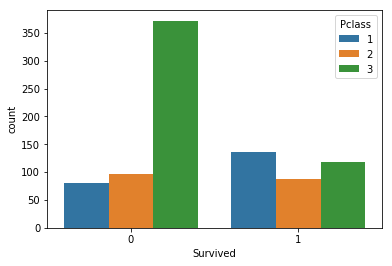

In [303]:
sns.countplot(x='Survived', hue='Pclass', data=df_train)

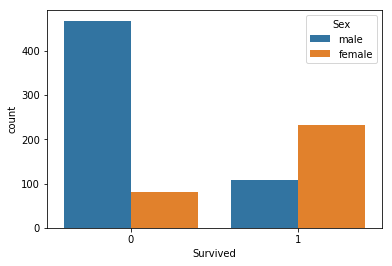

In [304]:
sns.countplot(x='Survived', hue='Sex', data=df_train)

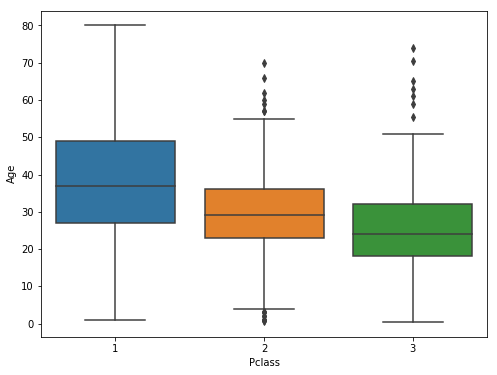

In [305]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass',y='Age',data=df_train)

In [306]:
def check_age(age):
    if pd.isnull(age):
        return int(df_train["Age"].mean())
    else:
        return age

In [307]:
df_train['Age'] = df_train['Age'].apply(check_age)

In [308]:
df_train['Age'].isnull().sum()

0

In [309]:
df_train.drop(["Cabin","Name"],inplace=True,axis=1)

In [310]:
df_train.dropna(inplace=True)

In [311]:
pd.get_dummies(df_train["Sex"]).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [312]:
sex = pd.get_dummies(df_train["Sex"])

In [313]:
embarked = pd.get_dummies(df_train["Embarked"])


In [314]:
pclass = pd.get_dummies(df_train["Pclass"])

In [315]:
df_train = pd.concat([df_train,pclass,sex,embarked],axis=1)

In [316]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,1,2,3,female,male,C,Q,S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,1,0,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,0,0,1,0,1,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,1,0,0,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,S,1,0,0,1,0,0,0,1
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0,0,1,0,1,0,0,1


In [317]:
df_train.drop(["PassengerId","Pclass","Sex","Ticket","Embarked"],axis=1,inplace=True)

In [318]:
df_train.head()

,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [319]:
X = df_train.drop("Survived",axis=1)
y = df_train["Survived"]

In [320]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [321]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [322]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.85      0.87      0.86       105
          1       0.80      0.78      0.79        73

avg / total       0.83      0.83      0.83       178



In [323]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[91, 14],
       [16, 57]], dtype=int64)

In [324]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy',max_depth = 4,random_state = 0)
dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)

In [325]:
accuracy_score_dtree = accuracy_score(y_pred_dtree,y_test)
accuracy_score_dtree

0.8258426966292135

In [326]:
# Random Forest
rf = RandomForestClassifier(criterion = 'gini',random_state = 0)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [327]:
y_pred_rf = rf.predict(X_test)
accuracy_score_rf = accuracy_score(y_pred_rf,y_test)
accuracy_score_rf

0.8089887640449438

In [328]:
sv = svm.SVC(kernel= 'linear',gamma =2)
sv.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [329]:
y_pred_svm = sv.predict(X_test)
accuracy_score_svm = accuracy_score(y_pred_svm,y_test)
accuracy_score_svm

0.8314606741573034

In [330]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [331]:
y_pred_knn = knn.predict(X_test)
accuracy_score_knn = accuracy_score(y_pred_knn,y_test)
accuracy_score_knn

0.7247191011235955

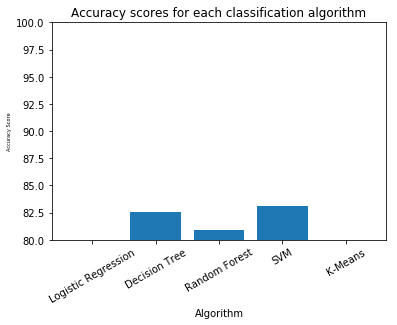

In [332]:
scores = [accuracy_score_lr,accuracy_score_dtree,accuracy_score_rf,accuracy_score_svm,accuracy_score_knn]
scores = [i*100 for i in scores]
algorithm  = ['Logistic Regression','Decision Tree','Random Forest','SVM', 'K-Means']
index = np.arange(len(algorithm))
plt.bar(index, scores)
plt.xlabel('Algorithm', fontsize=10)
plt.ylabel('Accuracy Score', fontsize=5)
plt.xticks(index, algorithm, fontsize=10, rotation=30)
plt.title('Accuracy scores for each classification algorithm')
plt.ylim(80,100)
plt.show() 

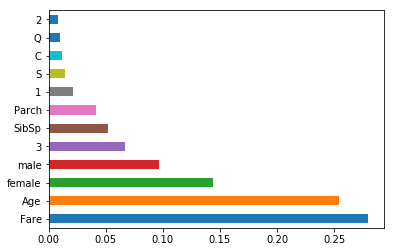

In [333]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')
plt.show()